In [1]:
from pogo import Pogo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import  datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from urllib.request import urlopen
from urllib.parse import urlparse
import os.path

In [3]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

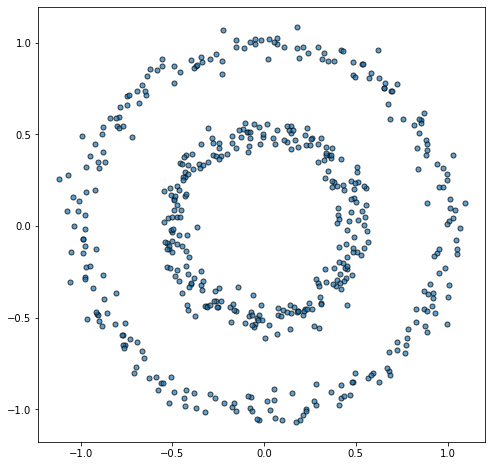

In [4]:
X=noisy_circles[0]
y=noisy_circles[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            #c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

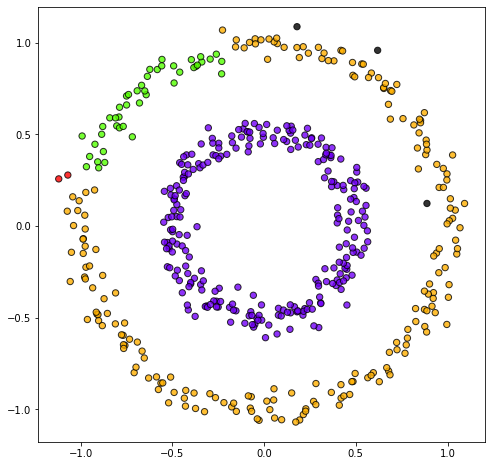

In [5]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [6]:
pogo.initial_idx_

2389

In [7]:
pogo.idx_

1996

In [8]:
pogo.candidates_[:20]

[2389,
 1996,
 1717,
 2320,
 1933,
 1824,
 2271,
 1628,
 1685,
 1592,
 1542,
 1908,
 1888,
 1663,
 2251,
 1572,
 1873,
 1531,
 1623,
 2246]

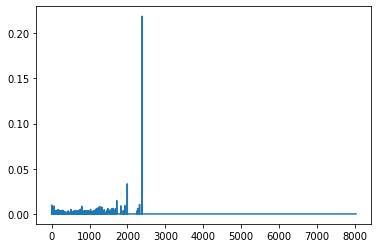

In [9]:
plt.plot(pogo.gap_vector_)

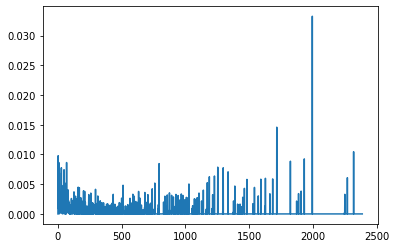

In [10]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 1628


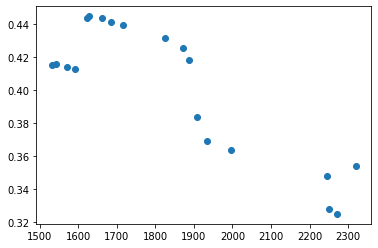

In [11]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 1996


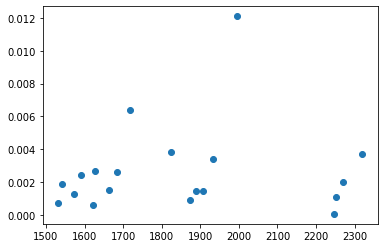

In [12]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 2320


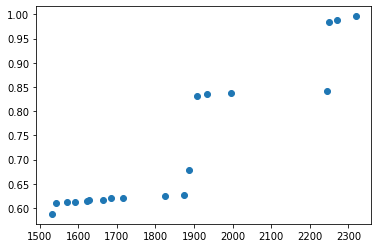

In [13]:
rand_indices, rand_array = pogo.plot_rand_score(y)


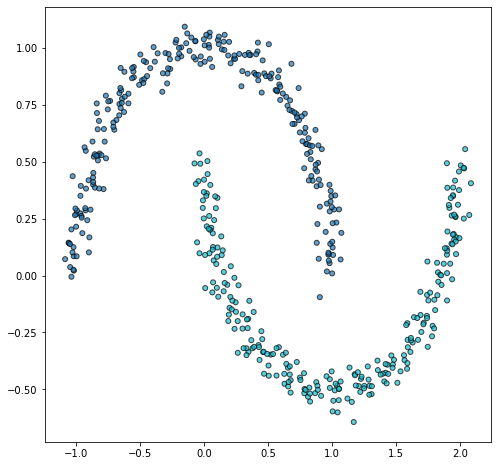

In [14]:
X=noisy_moons[0]
y=noisy_moons[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

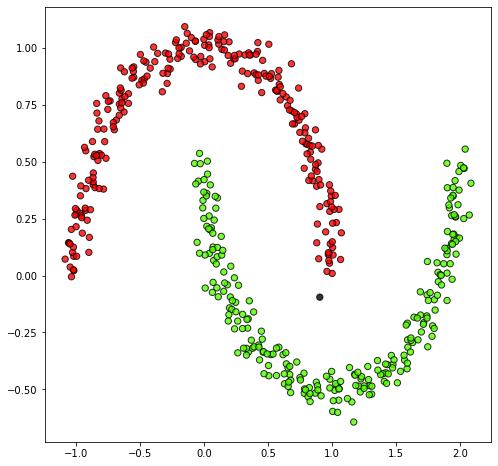

In [15]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [16]:
pogo.initial_idx_

3659

In [17]:
pogo.idx_

2621

In [18]:
pogo.candidates_[:10]

[3659, 2621, 2107, 1734, 1940, 2514, 1510, 1862, 1628, 1594]

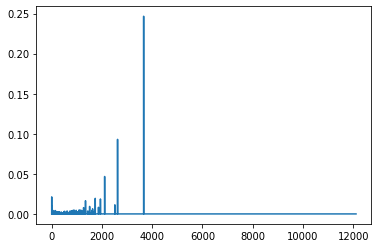

In [19]:
plt.plot(pogo.gap_vector_)

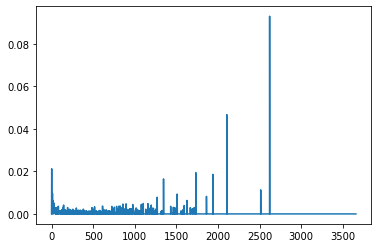

In [20]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 1668


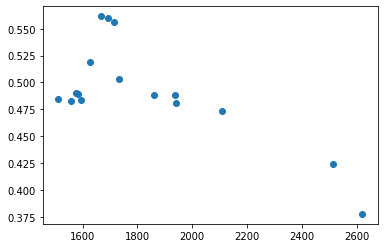

In [21]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 2621


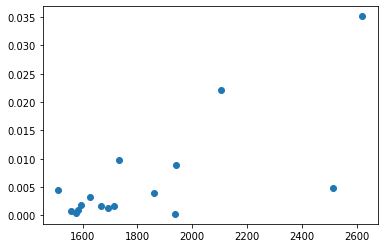

In [22]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 2621


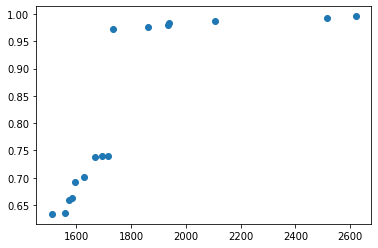

In [23]:
rand_indices, rand_array = pogo.plot_rand_score(y)


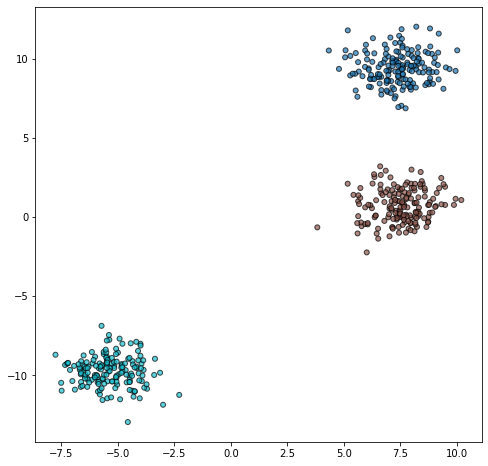

In [24]:
X=blobs[0]
y=blobs[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

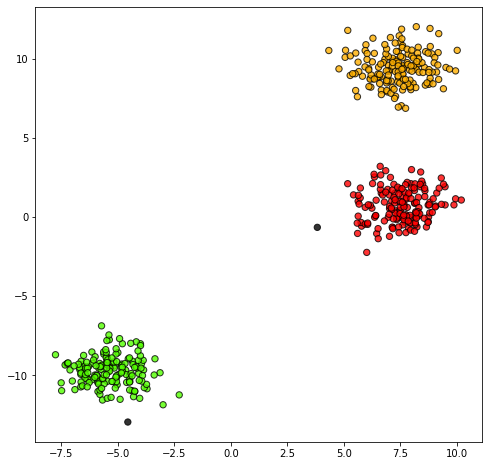

In [25]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [26]:
pogo.initial_idx_

22008

In [27]:
pogo.idx_

12286

In [28]:
pogo.candidates_[:20]

[22008,
 40162,
 16771,
 12286,
 8881,
 5322,
 10585,
 6624,
 4257,
 7996,
 3177,
 2924,
 2656,
 5107,
 4003,
 3739,
 1805,
 2105,
 2470,
 2355]

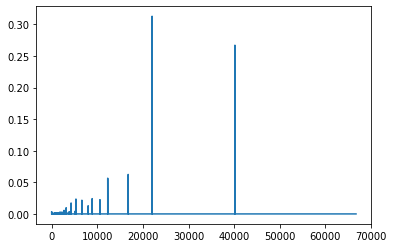

In [29]:
plt.plot(pogo.gap_vector_)

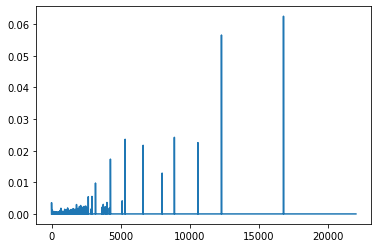

In [30]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 4257


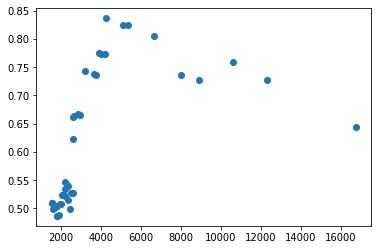

In [31]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 12286


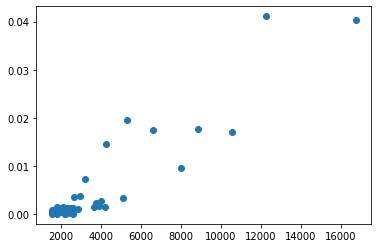

In [32]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 16771


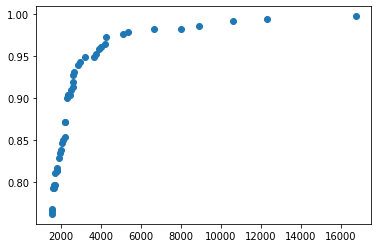

In [33]:
rand_indices, rand_array = pogo.plot_rand_score(y)


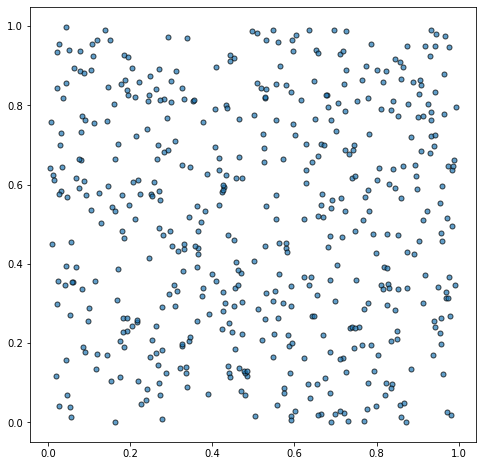

In [34]:
X=no_structure[0]
y=no_structure[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

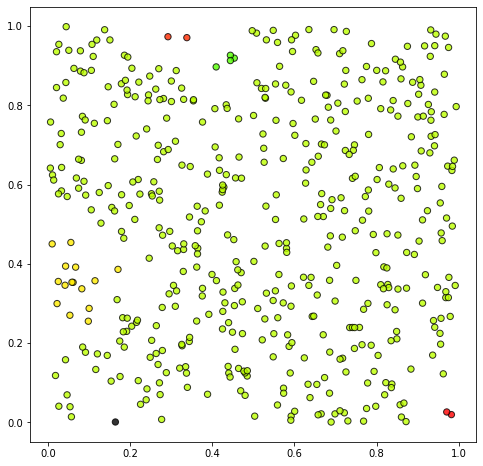

In [35]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [36]:
pogo.initial_idx_

1636

In [37]:
pogo.idx_

1516

In [38]:
pogo.candidates_[:20]

[1636,
 1516,
 2091,
 2523,
 2411,
 3329,
 1559,
 1558,
 1557,
 1556,
 1555,
 1554,
 1553,
 1552,
 1551,
 1550,
 1549,
 1548,
 1547,
 1546]

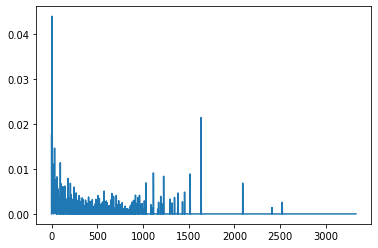

In [39]:
plt.plot(pogo.gap_vector_)

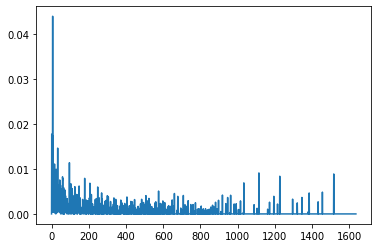

In [40]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 1516


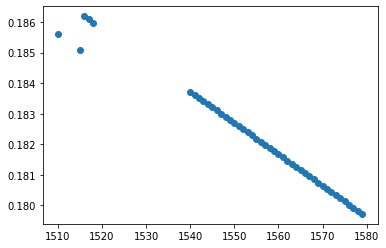

In [41]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 1516


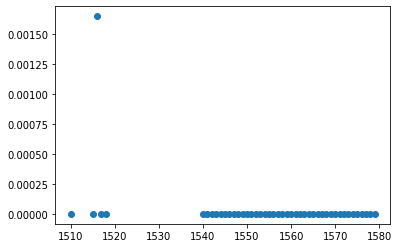

In [42]:
score_indices, score_array = pogo.plot_silhouette_score()

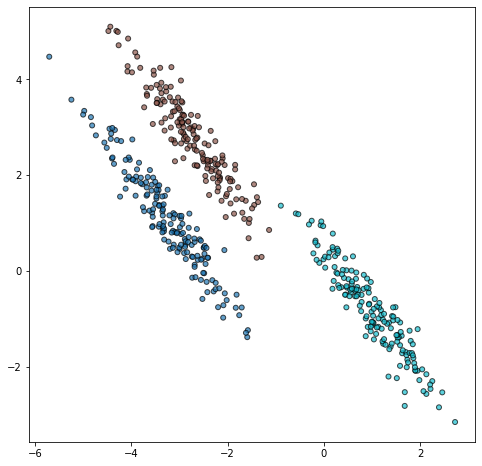

In [43]:
X=aniso[0]
y=aniso[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

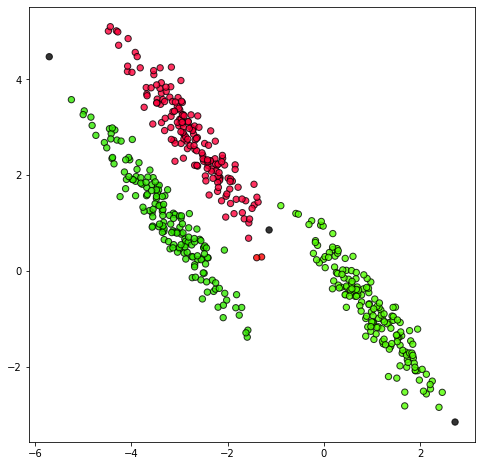

In [44]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [45]:
pogo.initial_idx_

8321

In [46]:
pogo.idx_

4803

In [47]:
pogo.candidates_[:20]

[8321,
 4803,
 7101,
 3035,
 1590,
 6584,
 4003,
 2643,
 4498,
 3436,
 3770,
 2482,
 1877,
 2133,
 2329,
 2843,
 3658,
 6391,
 1510,
 2249]

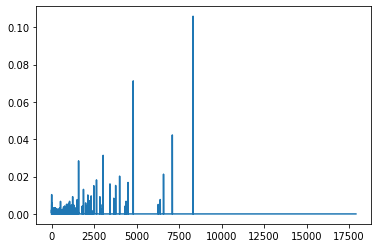

In [48]:
plt.plot(pogo.gap_vector_)

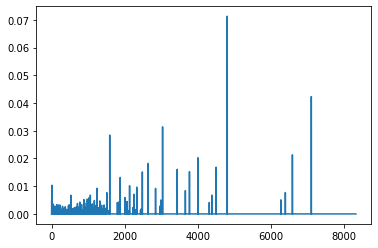

In [49]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2985


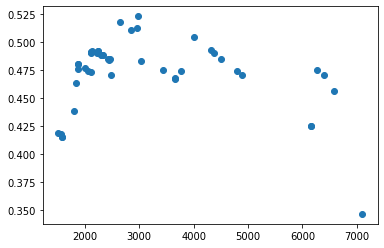

In [50]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 4803


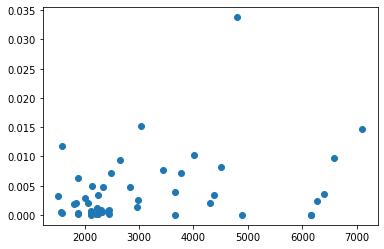

In [51]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 6584


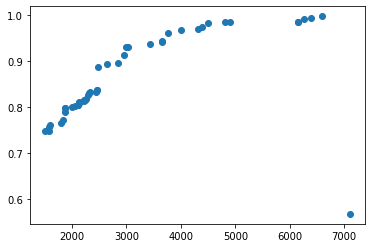

In [52]:
rand_indices, rand_array = pogo.plot_rand_score(y)


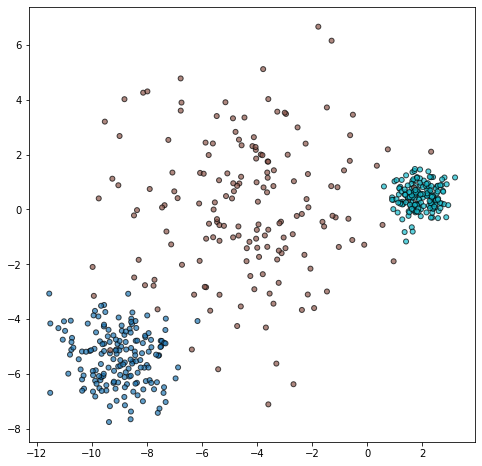

In [53]:
X=varied[0]
y=varied[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

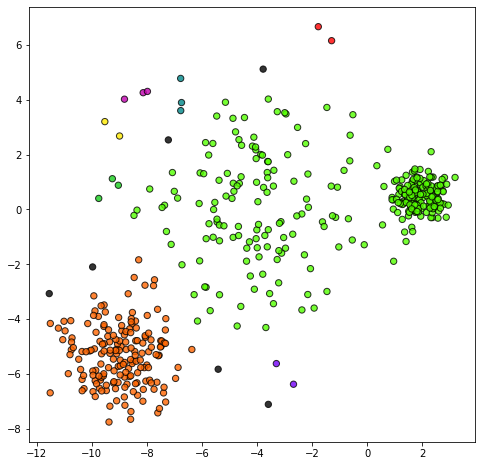

In [54]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [55]:
pogo.initial_idx_

18297

In [56]:
pogo.idx_

12260

In [57]:
pogo.candidates_[:20]

[18297,
 12260,
 15860,
 17325,
 5883,
 4283,
 8546,
 3849,
 10186,
 5369,
 11139,
 6926,
 13559,
 6221,
 2662,
 9244,
 14797,
 9570,
 14427,
 10601]

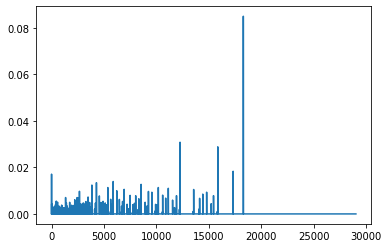

In [58]:
plt.plot(pogo.gap_vector_)

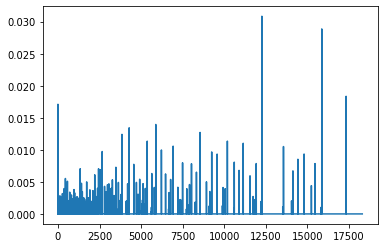

In [59]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2443


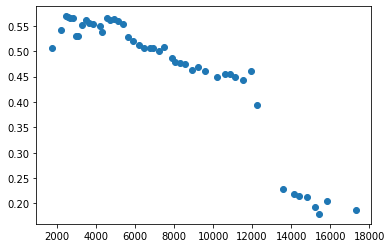

In [60]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 12260


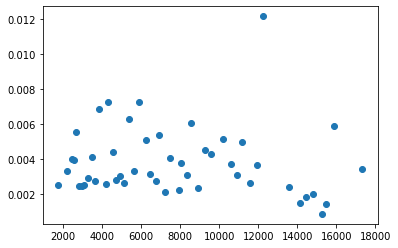

In [61]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 11921


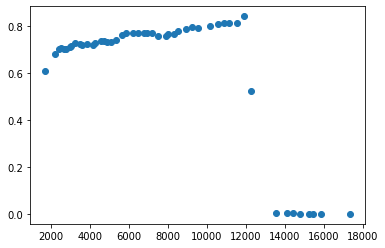

In [62]:
rand_indices, rand_array = pogo.plot_rand_score(y)


In [63]:
#DBSCAN Demo Data from scikitlearn
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

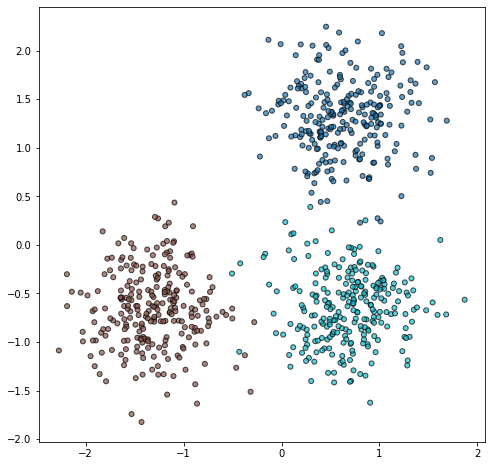

In [64]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

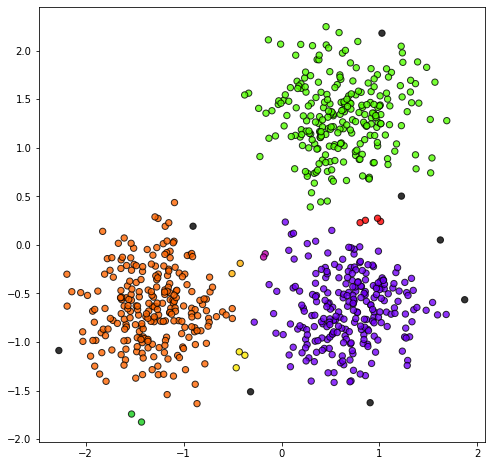

In [65]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [66]:
pogo.initial_idx_

15598

In [67]:
pogo.idx_

7424

In [68]:
pogo.candidates_[:20]

[15598,
 10681,
 9669,
 7424,
 13506,
 3904,
 4182,
 5875,
 20089,
 4817,
 12543,
 5532,
 6928,
 8461,
 5290,
 8104,
 9285,
 4609,
 8890,
 3004]

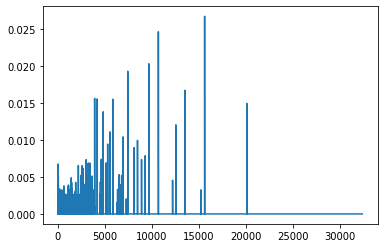

In [69]:
plt.plot(pogo.gap_vector_)

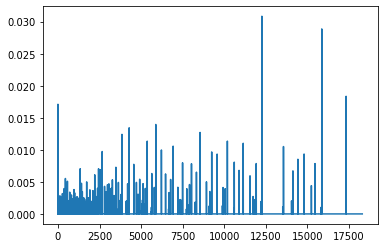

In [59]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2443


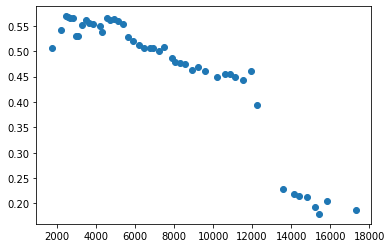

In [60]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 12260


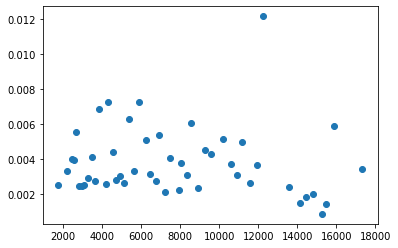

In [61]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 11921


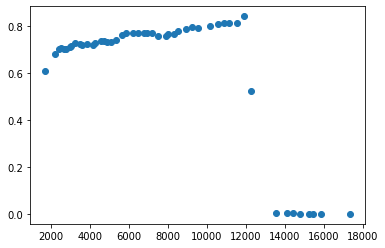

In [62]:
rand_indices, rand_array = pogo.plot_rand_score(y)


In [ ]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [ ]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename


In [ ]:
X, y, filename = return_dataset('R15.txt')

In [ ]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [ ]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.initial_idx_

In [ ]:
pogo.idx_

In [ ]:
pogo.candidates_[:20]

In [ ]:
plt.plot(pogo.gap_vector_)

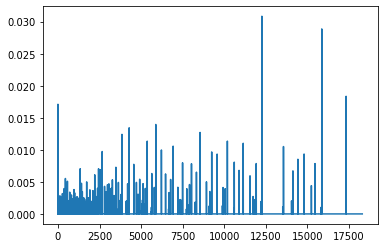

In [59]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2443


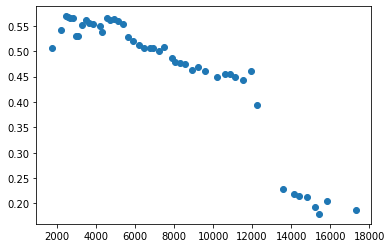

In [60]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 12260


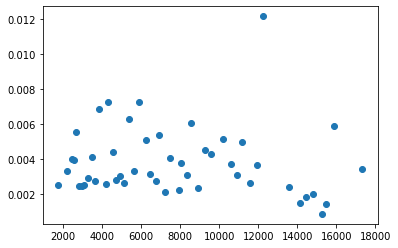

In [61]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 11921


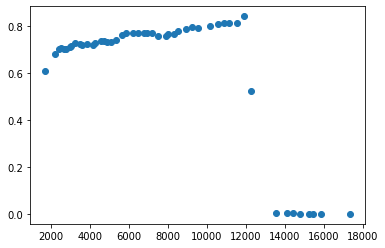

In [62]:
rand_indices, rand_array = pogo.plot_rand_score(y)


In [ ]:
X, y, filename = return_dataset('D31.txt')

In [ ]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.initial_idx_

In [ ]:
pogo.idx_

In [ ]:
pogo.candidates_[:40]

In [ ]:
plt.plot(pogo.gap_vector_)

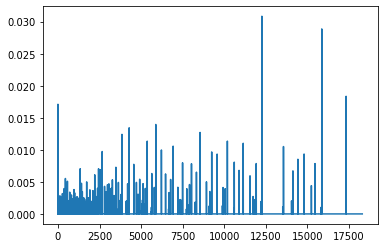

In [59]:
plt.plot(pogo.gap_vector_[:pogo.candidates_[0]])

Maximum Silhouette: 2443


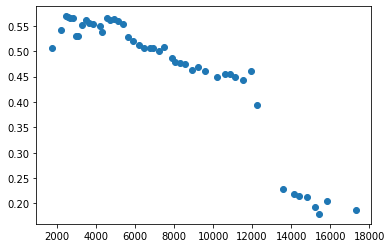

In [60]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 12260


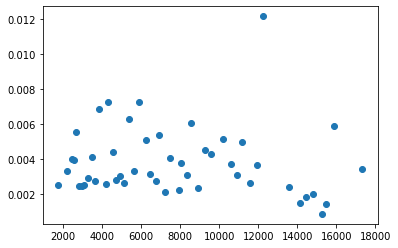

In [61]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 11921


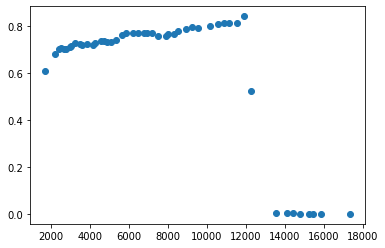

In [62]:
rand_indices, rand_array = pogo.plot_rand_score(y)
